In [2]:
""" General purpose for plotting specific trials for figures.
related to CRCNS plots (grid plots)
- SHould make any plots using fd or Probedat obsolete.
"""


' General purpose for plotting specific trials for figures.\nrelated to CRCNS plots (grid plots)\n- SHould make any plots using fd or Probedat obsolete.\n'

In [3]:

%cd ..
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [4]:
from pythonlib.dataset.dataset import Dataset
import pickle
import os


In [6]:
## LOAD
a = "Pancho"
e = "primitives2"
m = None

D = Dataset([])
D.load_dataset_helper(a, e)

# SDIR_MAIN = f"/data2/analyses/main/simple_summary/{animal}-{expt}"
# os.makedirs(SDIR_MAIN, exist_ok=True)

        

Did not load data!!!
HERE0
Searching using this string:
/data2/analyses/database//*Pancho*primitives2*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/data2/analyses/database/BEH/*Pancho*primitives2*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/BEH/Pancho-primitives2-formodeling-210610_220241
HERE1
----------------
Currently loading: /data2/analyses/database/BEH/Pancho-primitives2-formodeling-210610_220241
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 210606, 'edate': 210608, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'210606': 1, '210607': 1, '210608': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['primitives2'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': False, 'expt': 'primitives2', 'task_train_test': {'

In [66]:
## savedir
from pythonlib.tools.expttools import makeTimeStamp
ts = makeTimeStamp()
SDIR_MAIN = f"/data2/analyses/main/example_trials/{a}-{e}-{ts}"
os.makedirs(SDIR_MAIN, exist_ok=True)



In [9]:
D.Dat["character"].value_counts()

_arc          431
_L            234
_square       223
_circle       128
_triangle1    111
_zigzag        66
dot            62
_line          45
_squiggle1     38
Name: character, dtype: int64

In [46]:
trial_list = [
    "210608-1-391",
    "210608-1-575"
]

# find inds for these trials
dfout = D.findPandas("trialcode", trial_list, reset_index=False)
indexes = dfout.index.tolist()
indexes

[962, 1131]

In [49]:
# First recenter
D.preprocessGood(params=["recenter"])

['recenter']

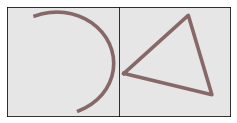

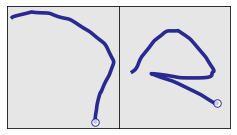

In [68]:
# Given list of trials, plot them in a grid
# Top row: stimulus
# Bottom row, behavior.

fig_task = D.plotMultTrials(indexes, which_strokes='strokes_task', naked_axes=True);
fig_beh = D.plotMultTrials(indexes, which_strokes='strokes_beh', naked_axes=True, add_stroke_number=False);



In [72]:
# save
from pythonlib.tools.expttools import writeDictToYaml
tmp = {"trials":trial_list}
sdir = f"{SDIR_MAIN}/primitives"
os.makedirs(sdir, exist_ok=True)
writeDictToYaml(tmp, f"{sdir}/trials.yaml")
fig_task.savefig(f"{sdir}/task.pdf")
fig_beh.savefig(f"{sdir}/beh.pdf")